# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# План работы
1) Изучение общей информации\
2) Предобработка данных\
3) Добавление новых столбцов\
4) Проведение анализа данных\
5) Подведение итогов
# Описание данных
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info() #Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.shape #Размер

(23699, 22)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

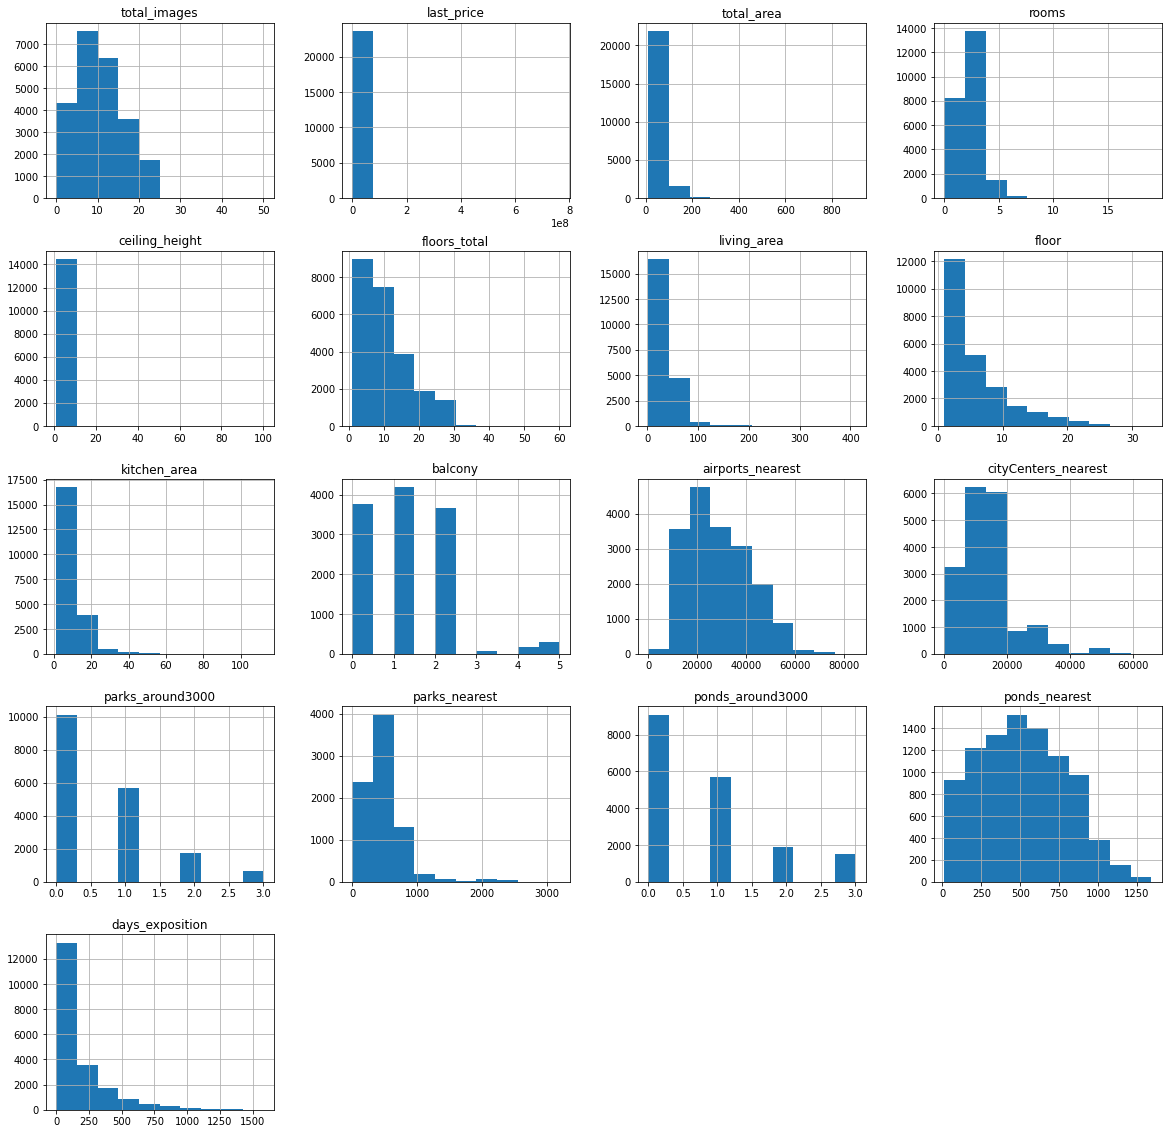

In [5]:
data.hist(figsize=(20,20)) #Гистограммы

In [6]:
data.isna().sum() #Количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В ходе обзора данных были изучены первые строки датафрейма, его размеры, тип значений столбцов и количество значений в них. После обзора можно сказать, что в датафрейме во множетсве столбцов присутствуют пропуски и указан неправильный тип данных. Присутствуют также выбросы и аномалии.

### Выполните предобработку данных

In [7]:
data['is_apartment']=data['is_apartment'].astype(bool) #Убираем пропуски и переводим в нужный тип столбец is_apartment

In [8]:
data['balcony'] = data['balcony'].fillna(0) #Заполняем пропуски в количестве балконов

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #Заполняем высоту потолков медианным значением

In [10]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == room), 'living_area'].mean()
#Заполняем пропуски в жилой площади медианным значением в зависимости от количества комнат

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) #Заполняем площади кухонь медианным значением

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #Заполняем пропуски в числе парков в радиусе 3 км
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #Заполняем пропуски в числе водоёмов в радиусе 3 км

In [13]:
data['balcony']=data['balcony'].astype(int)
data['ponds_around3000']=data['ponds_around3000'].astype(int)
data['parks_around3000']=data['parks_around3000'].astype(int)
#Меняем, где можно тип данных на целочисленный

In [14]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [15]:
#Проведём контроль изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причины появления пропусков могут быть различными. Это может быть ошибкой при выгрузке данных (для тех данных, что заполнялись автоматически), человеческим фактором (продавец забыл указать, либо не указал, подразумевая отсутствие (например в случае количества балконов, пропуск может означать, что балкона просто нет). Но верно и однозначно определить причину пропусков в текущей ситуации не представляется возможным

В стоблце 'is_apartment' есть два значение True/False (логический тип данных) - поэтому меняем тип данных на bool. В столбцах с количеством балконов, парков и водоёмов может хранится тольцо целочисленное значение (не может быть 0.5 балкона), поэтому тип данных меняем с float на int. Переводим дату в соответствующий формат

In [17]:
data['locality_name'].unique() #Список уникальных названий нас. пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
len(data['locality_name'].unique()) #Их количество

365

In [19]:
list = (data[data['locality_name'].isna() == 0]) #Саисок индексов строк, в которых в столбце названия нас.пункта, не пропущенное значение
for i in list.index.tolist():
    data.loc[i,'locality_name'] = data.loc[i,'locality_name'].split( )[-1] #Оставляем только название нас.пункта, без статуса (деревня/посёлок и т.д.)

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Оржицы',
       'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Лопухинка',
       'Пикалёво', 'Терв

In [21]:
len(data['locality_name'].unique()) #Число нас.пунктов после удаления дубликатов

295

In [22]:
data.duplicated().sum() #Проверка на явные дубликаты

0

### Добавьте в таблицу новые столбцы

In [23]:
data['price_one_km'] = (data['last_price']/data['total_area']).round(2) #Цена кв.км.
data['day_public'] = data['first_day_exposition'].dt.dayofweek #День недели
data['month_public'] = data['first_day_exposition'].dt.month #Месяц
data['year_public'] = data['first_day_exposition'].dt.year #Год
#Тип этажа
data['floor_type'] = data['floor'].where((data['floor'] == 1) | (data['floor'] == data['floors_total']), 'другой').where((data['floor'] != 1), 'первый').where((data['floor'] != data['floors_total']), 'последний')
data['city_center_km'] = (data['cityCenters_nearest']/1000).round(0) #Расстояние до центра города в км

In [24]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_km,day_public,month_public,year_public,floor_type,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,True,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,47.387941,9,True,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,True,...,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,True,...,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,True,...,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,31.736849,12,True,...,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

<AxesSubplot:>

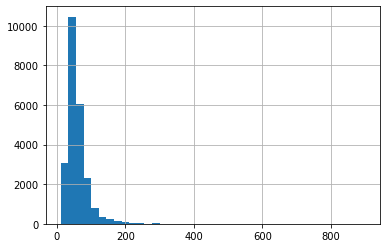

In [25]:
#Общая площадь
data['total_area'].hist(bins = 40)

<AxesSubplot:>

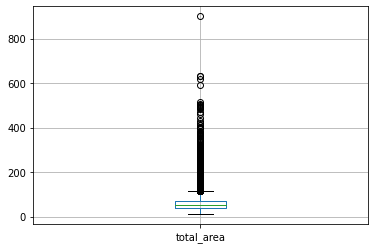

In [26]:
data.boxplot('total_area')

In [27]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [28]:
data = data[data['total_area'] <= 500]

Присутствуют различные значения, и несколько из них сильно выбиваются, слишком больние помещения удалим из датафрейма.

<AxesSubplot:>

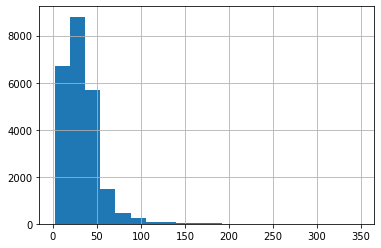

In [29]:
#Жилая площадь
data['living_area'].hist(bins = 20)

<AxesSubplot:>

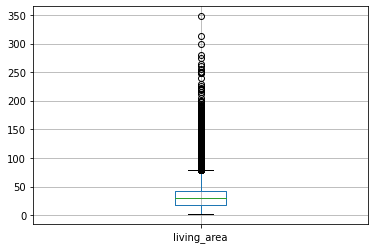

In [30]:
data.boxplot('living_area')

In [31]:
data['living_area'].describe()

count    23692.000000
mean        34.358641
std         21.225963
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        347.500000
Name: living_area, dtype: float64

In [32]:
data = data[data['living_area'] >= 5]

Несколько значений сильно больше остальных, однако есть и общая жилая площадь, соответствующая данной жилой.
При этом есть квартиры со слишком малой жил.площадью. Оставим только квартиры, с мин. жилой площадью в 5 кв.м.

<AxesSubplot:>

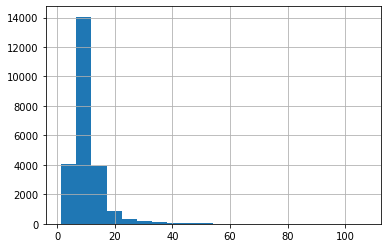

In [33]:
#Площадь кухни
data['kitchen_area'].hist(bins = 20)

<AxesSubplot:>

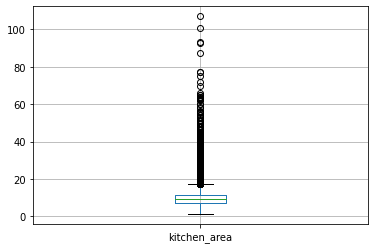

In [34]:
data.boxplot('kitchen_area')

In [35]:
data['kitchen_area'].describe()

count    23688.000000
mean        10.413354
std          5.534773
min          1.300000
25%          7.360000
50%          9.100000
75%         11.402500
max        107.000000
Name: kitchen_area, dtype: float64

In [36]:
data = data[data['kitchen_area'] >= 5]

Если большие кухни могут обуславливаться большими жил.площадями, то кухня в 1 кв.м. это не нормально. Оставим только кухни,
по площади не менее 5 кв.м.

<AxesSubplot:>

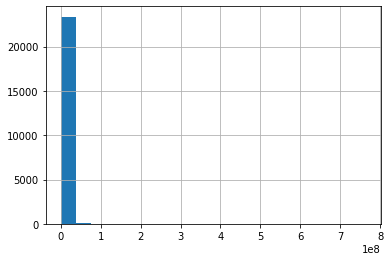

In [37]:
#Цена объекта
data['last_price'].hist(bins = 20)

In [38]:
data['last_price'].describe()

count    2.358300e+04
mean     6.505155e+06
std      1.029594e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

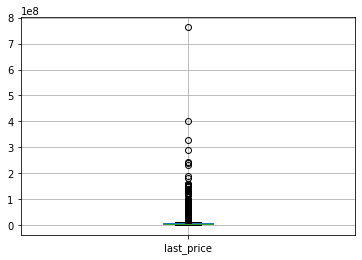

In [39]:
data.boxplot('last_price')

In [40]:
data=data.query('10**6 <= last_price <= 3*10**8')

Отбросим явно выбивающиеся слишком большие значения. Помимо этого отбросим цены ниже 1 млн.руб., ибо во второй столице России, цены дешевле выглядят явно как ошибка

<AxesSubplot:>

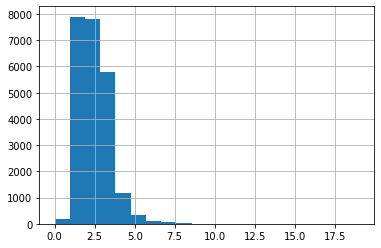

In [41]:
#Количество комнат
data['rooms'].hist(bins = 20)

<AxesSubplot:>

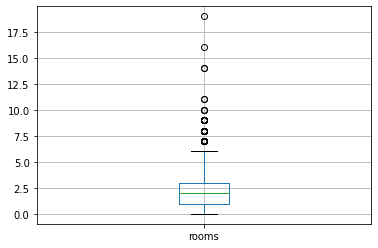

In [42]:
data.boxplot('rooms')

In [43]:
data['rooms'].describe()

count    23358.000000
mean         2.073893
std          1.073775
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [44]:
data = data.query('rooms > 0')

Если про максимальное количество комнат говорить нельзя (мало ли была произведена перепланировка, объединение квартир и т.п.), то ноль комнат - явный выброс.

<AxesSubplot:>

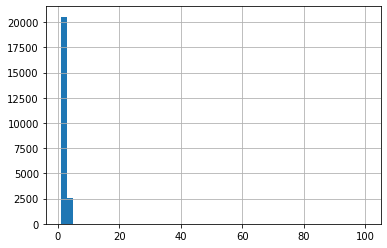

In [45]:
#Высота потолков
data['ceiling_height'].hist(bins = 50)

<AxesSubplot:>

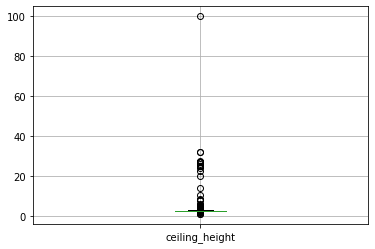

In [46]:
data.boxplot('ceiling_height')

In [47]:
data['ceiling_height'].describe()

count    23163.000000
mean         2.724477
std          0.986157
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [48]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10
data=data.query('ceiling_height >= 2')

Слишком больние значения скорее всего должны были быть записаны в вещественном виде, так что переводим их. Слишком маленькие (меньше двух метров) отбрасываем.

<AxesSubplot:>

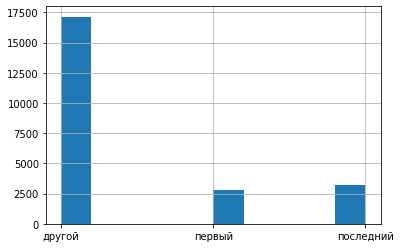

In [49]:
data['floor_type'].hist() #Тип этажа квартиры

Здесь выбросов нет.

<AxesSubplot:>

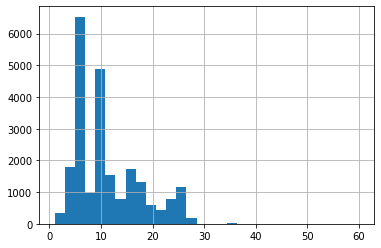

In [50]:
#Общее количество этажей
data['floors_total'].hist(bins = 30)

<AxesSubplot:>

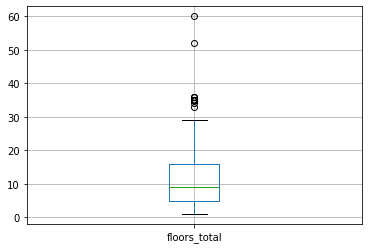

In [51]:
data.boxplot('floors_total')

In [52]:
data['floors_total'].describe()

count    23078.000000
mean        10.698284
std          6.561743
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

О выбросах говорить нельзя, так как в зданиях возможна разная этажность (в т.ч и 1 этаж)


<AxesSubplot:>

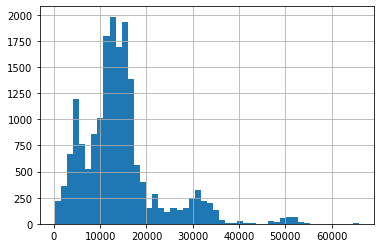

In [53]:
#Расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins = 50)

In [54]:
data['cityCenters_nearest'].describe()

count    17977.000000
mean     14187.212661
std       8598.430073
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

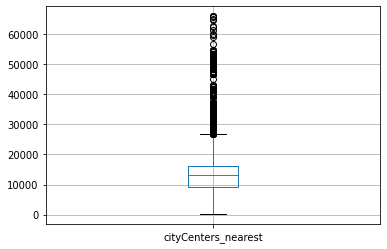

In [55]:
data.boxplot('cityCenters_nearest')

Расстояние до центра города сильно различается между собой, но о выбросах говорить нельзя, ведь очень большое расстояние можно объяснить тем, что квартира расположена в одном из городков/посёлков недалеко от самого Санкт-Петербурга.

<AxesSubplot:>

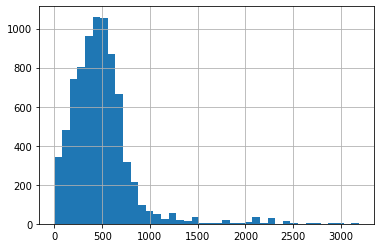

In [56]:
#Расстояние до ближайшего парка
data['parks_nearest'].hist(bins = 40)

In [57]:
data['parks_nearest'].describe()

count    8021.000000
mean      490.536467
std       342.881797
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

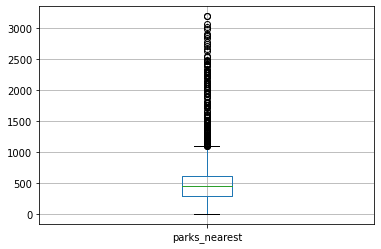

In [58]:
data.boxplot('parks_nearest')

Расстояние до парка может быть различным, поэтому о выбросах говорить нельзя, ведь относительно парков дома могут быть расположены на разных расстояниях (есть как дома с выходом в парки, так и кварталы без единого парка)

In [60]:
data.shape

(23160, 28)

In [61]:
23160/23699*100

97.72564243217013

Было удалено менее 3% данных из датафрейма

<AxesSubplot:>

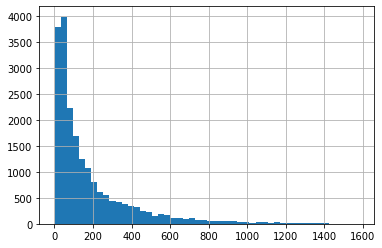

In [62]:
#Оценим время продажи квартиры
data['days_exposition'].hist(bins = 50)

<AxesSubplot:>

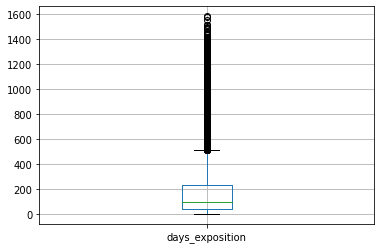

In [64]:
data.boxplot('days_exposition')

In [63]:
data['days_exposition'].describe()

count    20055.000000
mean       181.832211
std        220.440653
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи: 182 дня, медиана: 96. Т.к. есть сильно большие, выбивающиеся значения, лучше оценивать по медианному значению, так что среднее время продажи квартиры - 96 дней. Есть лоты, которые занимают и больше дней. Необычно долгими можно считать квартиры, продающиеся больше 233 дней. Быстрые продажи - в течение 45 дней

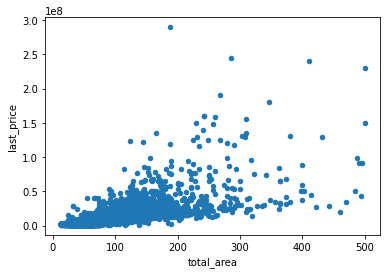

In [65]:
#Зависимость цены от общей площади
table = data.plot(x = 'total_area', y = 'last_price', kind = 'scatter')

In [66]:
data['last_price'].corr(data['total_area'])

0.7107926107699848

Зависимость между ценой и общей площадью есть (чем больше площадь, тем больше цена), коэффицент корреляции довольно большой - 0.7

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

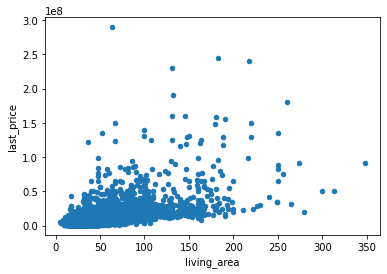

In [71]:
#Зависимость цены от жилой площади
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter')

In [69]:
data['last_price'].corr(data['living_area'])

0.6063243503622102

Зависимость между ценой и жилой площадью есть (чем больше площадь, тем больше цена), но меньше, чем зависимость от итоговой площади; коэффицент корреляции - 0.6.


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

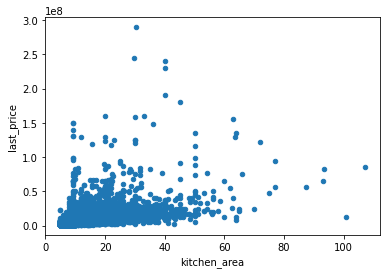

In [72]:
#Зависимость цены от кухонной площади
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter')

In [73]:
data['last_price'].corr(data['kitchen_area'])

0.49911213072507804

Зависимость между ценой и площадью кухни есть (чем больше площадь, тем больше цена), но меньше, чем зависимость от итоговой площади; коэффицент корреляции - 0.5.

<AxesSubplot:xlabel='rooms'>

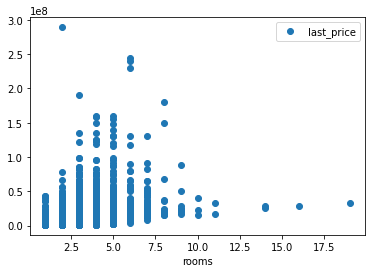

In [74]:
#Зависимость цены от количества комнат
data.plot(x = 'rooms', y = 'last_price', style = 'o' )

In [75]:
data['last_price'].corr(data['rooms'])

0.41329320224111865

Зависимость между ценой и количеством комнат есть, но она выражена не настолько сильно, если сравнивать с предыдущими анализами.

<AxesSubplot:xlabel='floor_type'>

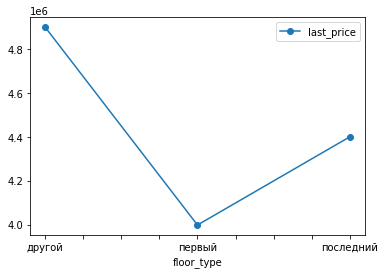

In [78]:
data.pivot_table(index='floor_type',values = 'last_price', aggfunc='median').plot(style = 'o-' )

О сильной зависимости говорить нельзя (разница медианных значений меньше миллиона рублей), однако стоит отметить, что квартиры на первом этаже - самые дешёвые, квартиры на последнем этаже тоже дешевле промежуточных этажей.

<AxesSubplot:xlabel='day_public'>

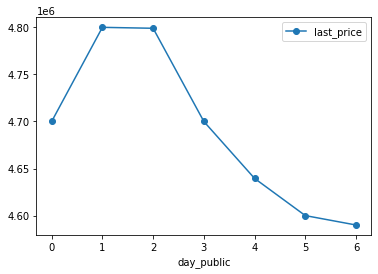

In [79]:
#Зависимость цены от даты размещения (день публикации объявления)
data.pivot_table(index='day_public',values = 'last_price', aggfunc='median').plot(style = 'o-')

Наибольшая цена продажи при размещении объявления во вторник и среду, далее идёт на спад. Наименьшая цена - в воскресенье

<AxesSubplot:xlabel='month_public'>

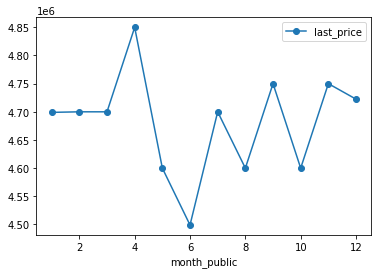

In [83]:
#Зависимость цены от даты размещения (месяц публикации объявления)
data.pivot_table(index='month_public',values = 'last_price', aggfunc='median').plot(style = 'o-')

Цена с января по март находится на одном уровне, далее осуществляется сильная просадка до июня, дальше цена колеблется.

<AxesSubplot:xlabel='year_public'>

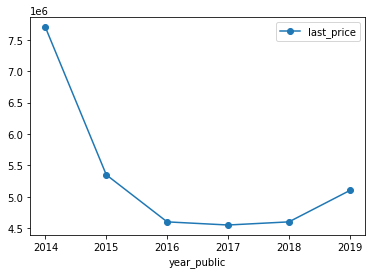

In [84]:
#Зависимость цены от даты размещения (год публикации объявления)
data.pivot_table(index='year_public',values = 'last_price', aggfunc='median').plot(style = 'o-')

Самые высоки цены наблюдались в 2014 году, после чего шёл спад до 2017 года. Далее цены снова пошли вверх

Больше всего на цену влияют такие факторы как общая площадь квартиры и жилая площадь

In [92]:
table = data.pivot_table(index='locality_name',values='price_one_km', aggfunc=['count','mean'])
table.columns = ['count', 'mean']
table = table.sort_values(by='count', ascending = False)
table = table.iloc[:10,:]
table

,count,mean
locality_name,,
Санкт-Петербург,15545,114422.972562
Мурино,558,85337.738423
Кудрово,451,95150.960355
Шушары,434,78238.944700
Всеволожск,391,68683.728440
Пушкин,366,103188.211421
Колпино,338,75424.579112
Парголово,323,90289.778019
Гатчина,301,69038.943654


Среди 10 посёлков с наиб. количеством объявлений наибольшая стоимость кв.м в С-Петербурге, а наим. стоимость кв.м. в Выборге

In [94]:
table['mean'].mean() #Средняя стоимость квадратного м. в 10 посёлках с наиб. кол-вом объявлений.

83851.16416003476

In [95]:
SaintPet = data.loc[data['locality_name'] == 'Санкт-Петербург',['last_price','city_center_km']]
SaintPet = SaintPet.pivot_table(index='city_center_km', values = 'last_price')
SaintPet #Средняя стоимость квартиры, в зависимости удаления от центра города

,last_price
city_center_km,
0.0,3.144912e+07
1.0,1.964995e+07
2.0,1.655665e+07
3.0,1.116668e+07
4.0,1.226122e+07
5.0,1.392242e+07
6.0,1.517376e+07
7.0,1.485056e+07
8.0,9.322605e+06


<AxesSubplot:xlabel='city_center_km'>

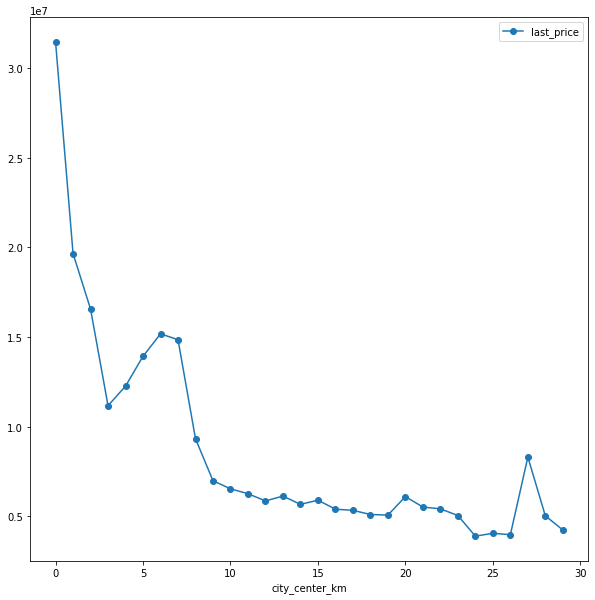

In [96]:
SaintPet.plot(style='o-', figsize=(10,10))

Стоимость объекта падает при удалении от центра города, однако можно отметить несколько скачков (в районе 6-7 км и 27-28 км)

### Напишите общий вывод

В рамках данной работы был изучен датафрейм с данными сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Были обработаны пропущенные значения, неправильные типы данных в столбце, аномалии и выбросы. Далее изучены зависимости стоимости квартиры от различных параметров (общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год)) Больше всего на цену влияют такие факторы как общая площадь квартиры, жилая площадь, также стоит отметить количество комнат и время выставления объявления о продаже. Затем были найдены 10 посёлков с наибольшим количеством объявлений и изучена стоимость кв.м. жилья в них. Наибольшая стоимость кв.м в Санкт-Петербурге, а наим. стоимость кв.м. в Выборге. Также была изучена зависимость цены жилья от расстояния до центра города, выяснилось, что при удалении от центра города стоимость жилья уменьшается

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [X]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [X]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [X]  На каждом этапе сделаны промежуточные выводы.
- [X]  В конце проекта сделан общий вывод.